<a href="https://colab.research.google.com/github/duybluemind1988/project_py/blob/main/Churn/Churn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get data

In [2]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data analysis

In [25]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [26]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [27]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [28]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [29]:
print(X_train.shape)
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_train = X_train.dropna()
print(X_train.shape) # remove 7 values

(4507, 20)
(4500, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
print(X_test.shape)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
X_test = X_test.dropna()
print(X_test.shape) # remove 7 values

(1409, 20)
(1407, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Sweetvis

In [ ]:
#!pip install sweetviz

In [33]:
import sweetviz as sv

my_report = sv.analyze(X_train)
my_report.show_html("analyze.html",open_browser=False) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
import IPython
IPython.display.HTML("analyze.html")

In [ ]:
compare_report = sv.compare([X_train,"train"],[X_test,"test"])
compare_report.show_html("compare.html",open_browser=False) 

In [ ]:
IPython.display.HTML("compare.html")

## Autovis

In [ ]:
!pip install autoviz

Shape of your Data Set: (7043, 21)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  11
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    21 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables


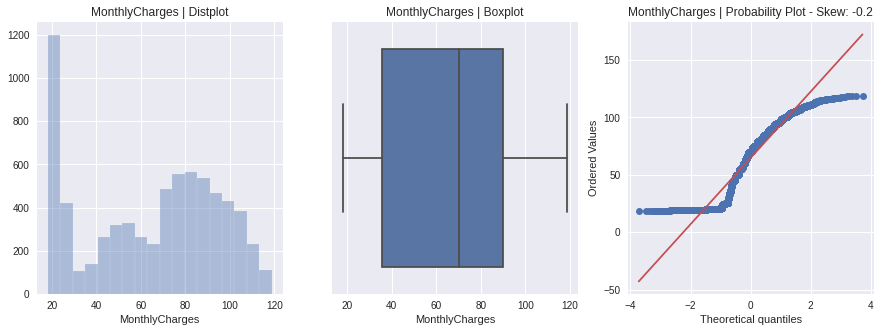

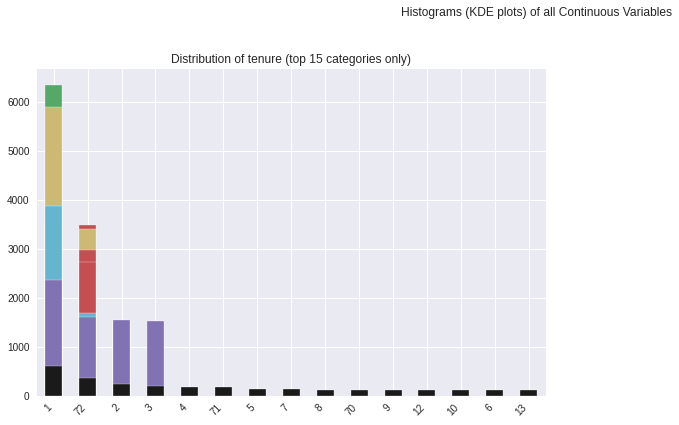

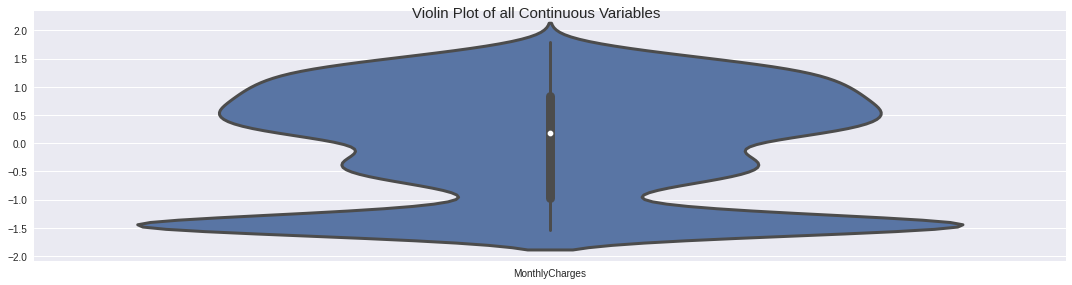

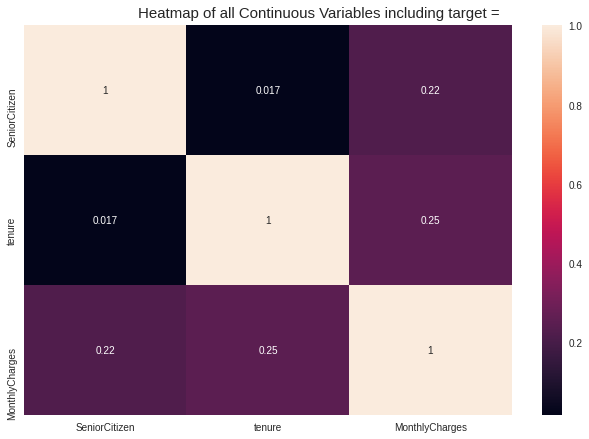

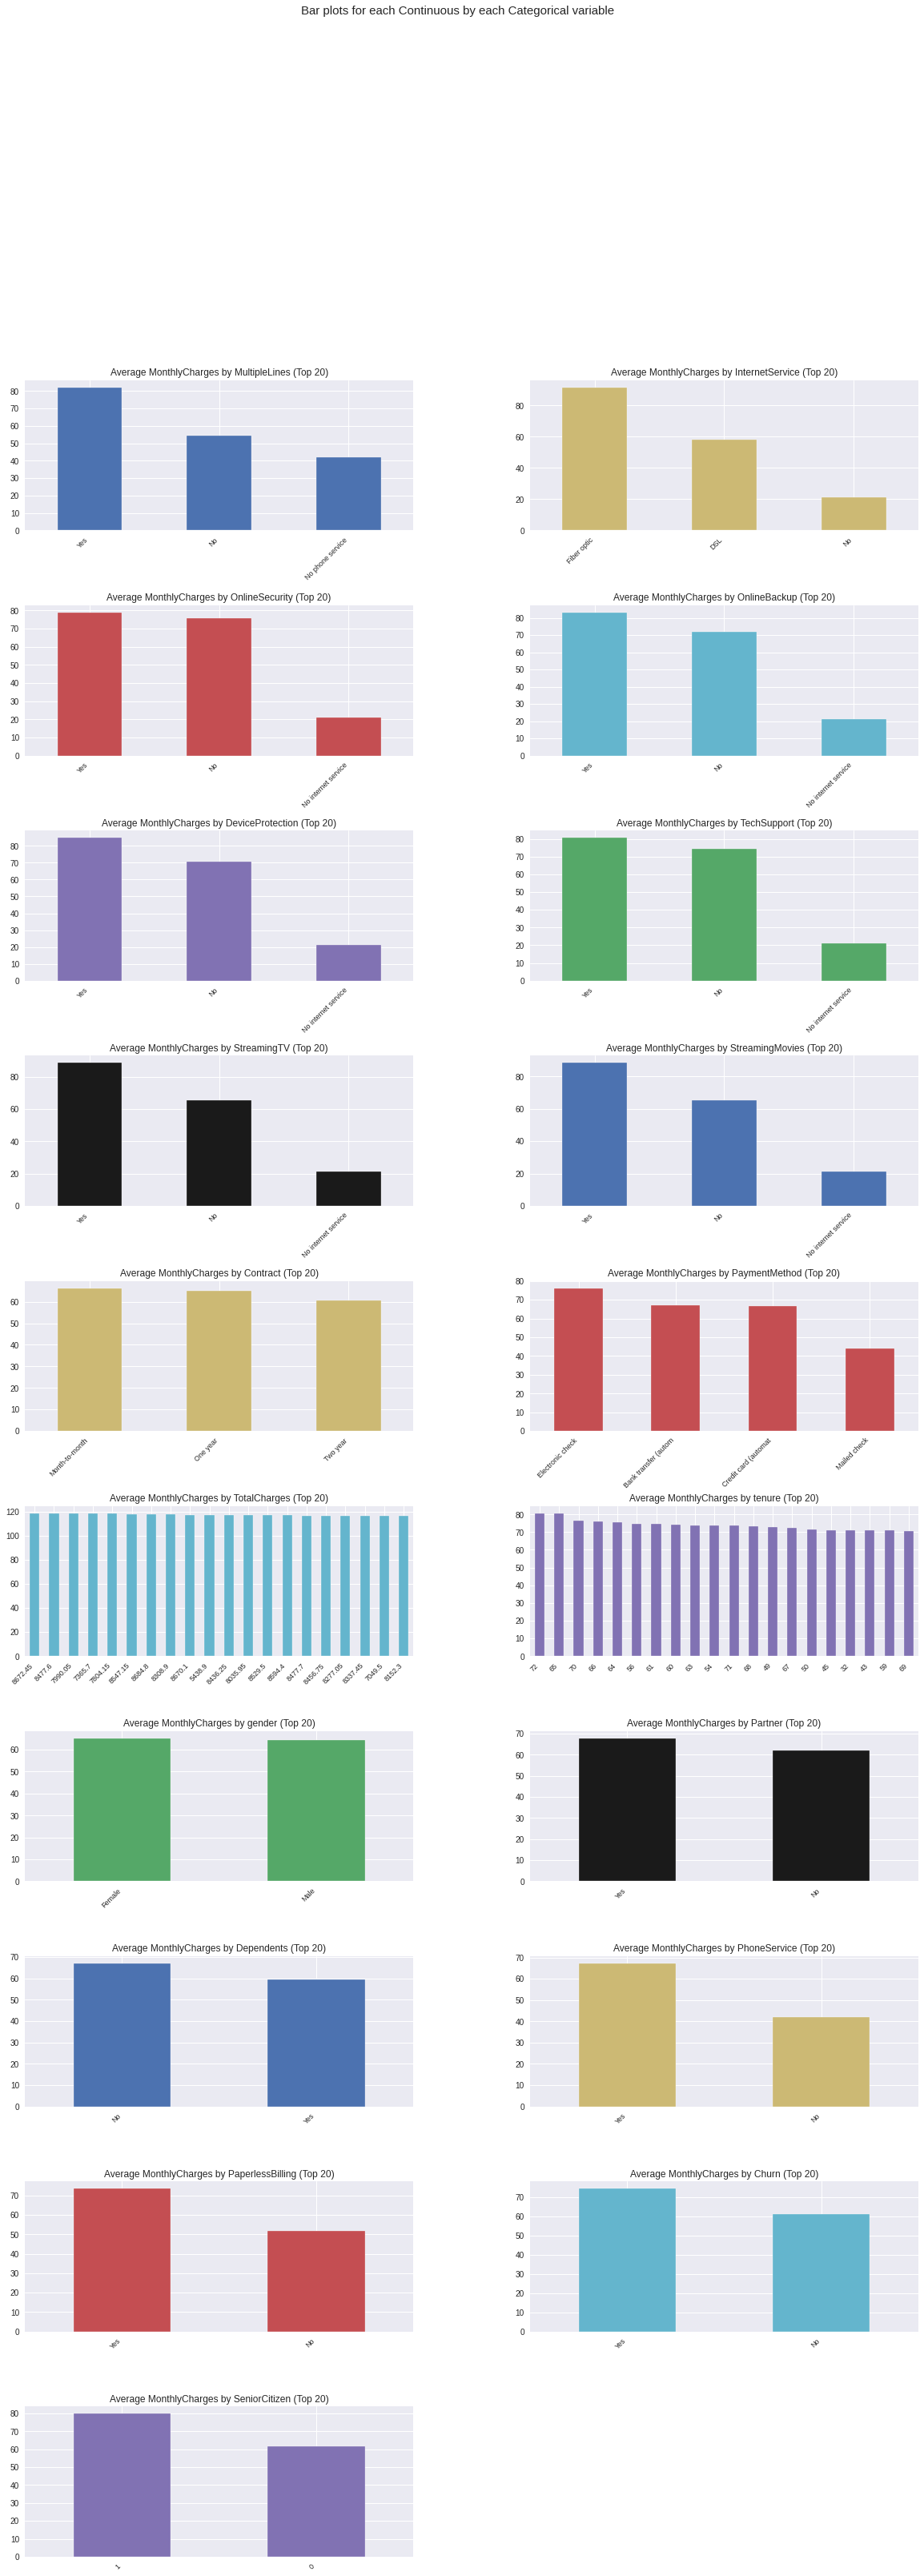

Time to run AutoViz (in seconds) = 7.459

 ###################### VISUALIZATION Completed ########################


In [53]:
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(path)

## Dtale

In [ ]:
#!pip install dtale

In [64]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(X_train)

https://ddzhzwx83oe-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/7

# 3. Model

## Split data

In [68]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [70]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


## Worflow

In [71]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
731,6621-YOBKI,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,92.75
5546,7880-XSOJX,Male,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,42.40,146.4
3023,0238-WHBIQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.3
3914,1755-FZQEC,Male,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,791.15
4787,5542-DHSXL,Female,0,Yes,No,4,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.70,235.05


- Replace '' in Total charges column
- Convert to category or ordinal encoder or one hot encoder
- No need to remove NA value for tree method


In [72]:
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)

In [74]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [88]:
def to_category(x):
  return x.astype("category")

to_category_transform = preprocessing.FunctionTransformer(to_category)

In [104]:
X_train_a = to_category_transform.fit_transform(X_train)
X_train_a["gender"]

731       Male
5546      Male
3023      Male
3914      Male
4787    Female
         ...  
913       Male
3170      Male
1222      Male
5109      Male
6524      Male
Name: gender, Length: 4507, dtype: category
Categories (2, object): ['Female', 'Male']

In [119]:
#Standard scaler all numeric value
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler())])

#One hot encoder all category value
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = pipeline.Pipeline(steps=[("astype_category",to_category_transform)])


transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
]
preprocessor = compose.ColumnTransformer(transformers)

In [120]:
# Create transform X value
X_train_tran = preprocessor.fit_transform(X_train)
X_test_tran=preprocessor.transform(X_test)

In [123]:
pd.DataFrame(X_train_tran)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.42989,-1.12507,-1.48178,-0.972213,6621-YOBKI,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1,-0.42989,-1.1657,-0.742942,-0.948456,7880-XSOJX,Male,No,No,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check
2,-0.42989,1.59694,0.841966,1.7939,0238-WHBIQ,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3,-0.42989,0.256246,-1.49686,-0.662946,1755-FZQEC,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
4,-0.42989,-1.1657,-0.330799,-0.9092,5542-DHSXL,Female,Yes,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,-0.42989,-0.840681,-1.49184,-0.895052,5993-BQHEA,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic)
4503,-0.42989,-0.19065,1.1938,0.17722,7272-QDCKA,Male,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Electronic check
4504,-0.42989,1.27192,0.156736,0.956278,9091-WTUUY,Male,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check
4505,-0.42989,1.35317,0.0428104,0.80098,7113-HIPFI,Male,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check


In [121]:
pd.DataFrame(X_test_tran)[5]

0       Female
1       Female
2         Male
3       Female
4         Male
         ...  
1404      Male
1405      Male
1406      Male
1407      Male
1408    Female
Name: 5, Length: 1409, dtype: object